In [1]:
%matplotlib inline

#Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from scipy import stats

#Load CSV

city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [4]:
city_data_df.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [5]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Rural")

18

In [9]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [10]:
ride_data_df.columns


Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [11]:
#Merge your DataFrames.
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


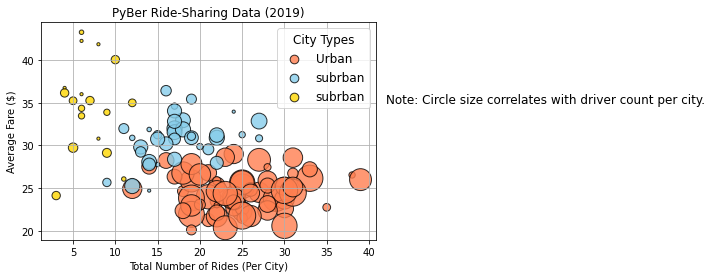

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size 
# based on the total number of drivers for each city type, including urban, suburban, and rural.

# create the urban city dataframe
urban_cities_df =  pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df =  pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df =  pyber_data_df[pyber_data_df["type"] == "Rural"]

#count per city per for a given type - this made the xaxis
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

#Get average fare for each citytype
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10 *urban_driver_count,
            c="coral",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,  
            label="Urban")



plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10 *suburban_driver_count,
            c="skyblue",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,  
            label="subrban")



plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10 *rural_driver_count,
            c="gold",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,  
            label="subrban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
# Create a legend


#in place of plt.legend()
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.show()

# Save the figure.
plt.savefig("Analysis/Fig1.png")

In [13]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [14]:
# Get summary statistics.
urban_ride_count.describe()
urban_ride_count.median()

24.0

In [15]:
suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [16]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [17]:
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.

urban_ride_count_total = urban_cities_df.count()["ride_id"]
suburban_ride_count_total = suburban_cities_df.count()["ride_id"]
rural_ride_count_total = rural_cities_df.count()["ride_id"]

# print(urban_ride_count_total)

# The average fares for each city type.

mean_urban_fares = urban_cities_df.mean()["fare"]
mean_suburban_fares =suburban_cities_df.mean()["fare"]
mean_rural_fares=rural_cities_df.mean()["fare"]

print(mean_urban_fares)
print(mean_suburban_fares)
print(mean_rural_fares)

# The total number of drivers for each city type.
urban_driver_total = urban_cities_df.sum()["driver_count"]
suburban_driver_total = suburban_cities_df.sum()["driver_count"]
rural_driver_total = rural_cities_df.sum()["driver_count"]

# print(urban_driver_total)

urban_driver_mean = urban_cities_df.mean()["driver_count"]
suburban_driver_mean = suburban_cities_df.mean()["driver_count"]
rural_driver_mean = rural_cities_df.mean()["driver_count"]
print(urban_driver_mean)
print(suburban_driver_mean)
print(rural_driver_mean)

24.52577230769236
30.97012800000002
34.623440000000016
36.67815384615385
13.712
4.296


In [18]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [19]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [20]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

#round(urban_ride_count.sts.mode(),2), round(suburban_ride_count.sts.mode(),2), round(rural_ride_count.sts.mode(),2)
stats.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

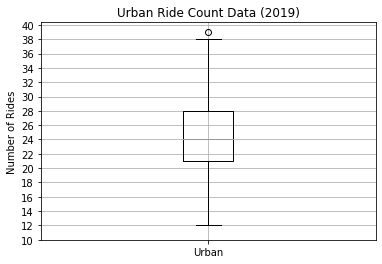

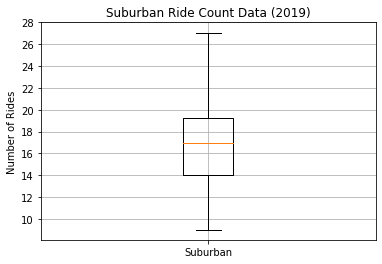

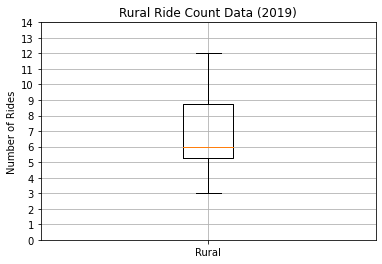

In [21]:
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Urban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Suburban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 30, step=2.0))
ax.grid()

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Rural Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,15, step=1.0))
ax.grid()
plt.show()

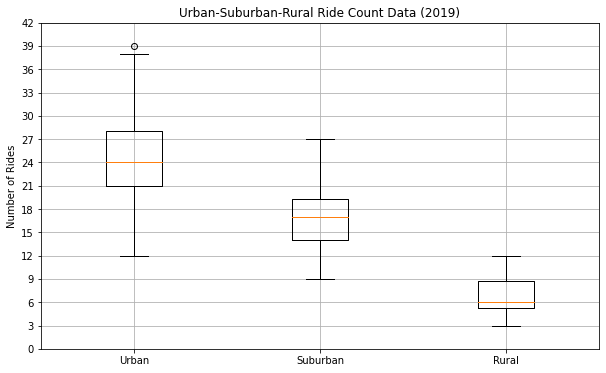

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a box-and-whisker plot for the all city types ride count.
all_rides =[urban_ride_count,suburban_ride_count,rural_ride_count]

x_labels = ["Urban", "Suburban", "Rural"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(all_rides, labels=x_labels)
ax.set_title('Urban-Suburban-Rural Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.show()

# Save the figure.
plt.savefig("Analysis/Fig2.png")

In [23]:
# get the city that matches 39

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [24]:
#Get average fare for each citytype
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]


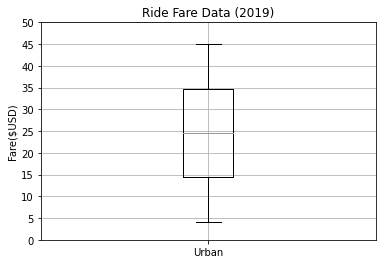

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [25]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()




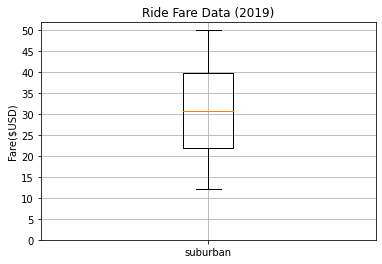

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [26]:
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

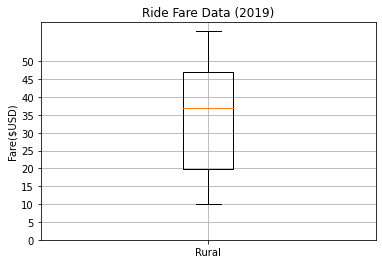

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [29]:

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

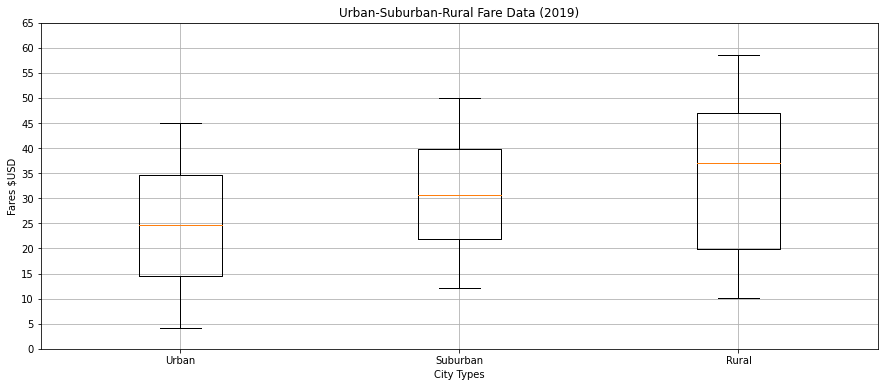

<Figure size 432x288 with 0 Axes>

In [38]:
# Create a box-and-whisker plot for the all city types ride count.
all_fares =[urban_fares,suburban_fares,rural_fares]

x_labels = ["Urban", "Suburban", "Rural"]

fig, ax = plt.subplots(figsize=(15, 6))
ax.boxplot(all_fares, labels=x_labels)
ax.set_title('Urban-Suburban-Rural Fare Data (2019)')
ax.set_xlabel('City Types')
ax.set_ylabel("Fares $USD")
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()

plt.show()

# Save the figure.
#Get average fare for each citytype
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]plt.savefig("Analysis/Fig3.png")

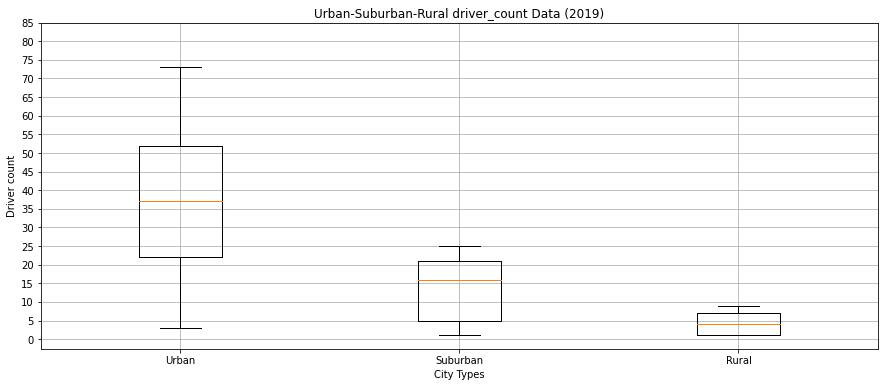

<Figure size 432x288 with 0 Axes>

In [40]:
#Get driver count for each city type
urban_driver_count = urban_cities_df["driver_count"]
suburban_driver_count = suburban_cities_df["driver_count"]
rural_driver_count = rural_cities_df["driver_count"]

# Create a box-and-whisker plot for the all city types ride count.
all_driver_count =[urban_driver_count,suburban_driver_count,rural_driver_count]

x_labels = ["Urban", "Suburban", "Rural"]

fig, ax = plt.subplots(figsize=(15, 6))
ax.boxplot(all_driver_count, labels=x_labels)
ax.set_title('Urban-Suburban-Rural driver_count Data (2019)')
ax.set_xlabel('City Types')
ax.set_ylabel("Driver count")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.show()

# Save the figure.
plt.savefig("Analysis/Fig4.png")

In [28]:
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.

